In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
units  = pd.read_csv('../final/unit_assignments.csv')
units.columns

Index(['uid', 'unit_no', 'start_date', 'end_date'], dtype='object')

In [ ]:
end_date = max(pd.to_datetime(units['end_date'].values)) # largest end date
# print('Number of distinct uids in database:', len(set(history['uid'])))

# history_profiles = {}
# for uid in tqdm_notebook(set(units['uid'])):
#     history_profiles[uid] = {}
#     vals = units[units['uid'] == uid].values
#     for v in vals:
#         if np.isnan(v[1]):
#             pass
#         else:
#             history_profiles[uid][int(v[1])] = v[2], v[3]
# np.save('history_profiles', history_profiles)

history_profiles = np.load('../../derived_data/history_profiles.npy', allow_pickle=1).item()

# # distribution of number of units/officer

a = [len(history_profiles[individual_officer]) for individual_officer in history_profiles]
plt.figure(figsize = (12,3))
plt.subplot(121)
plt.hist(a, bins = 20)
plt.xlabel('# Units', fontsize = 18)
plt.ylabel('# Officers', fontsize = 18)
plt.xticks(np.arange(18)[::2], np.arange(1,19)[::2], fontsize = 14)
plt.yticks(fontsize = 14)


# appointment_length = []
# for officer in history_profiles:
#     for unit in history_profiles[officer]:
#         start_end = history_profiles[officer][unit]
#         start, end = pd.to_datetime(start_end[0]), pd.to_datetime(start_end[1])
#         if pd.isna(start):
#             pass
#         else:
#             if pd.isna(end) == 0:
#                 duration= end-start
#                 appointment_length.append(duration.days)
#             if pd.isna(end):
#                 appointment_length.append(-1)
# appointment_length = np.array(appointment_length)
# app_len = appointment_length[appointment_length>0]

plt.subplot(122)
plt.hist(app_len/365, bins = 50)
plt.xlabel('# Years spent in unit', fontsize = 18)
plt.ylabel('# Units assigments', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.savefig('../doc/figs/units_officers.pdf', bbox_inches = 'tight', dpi = 1000)
# plt.savefig('../doc/figs/units_officers.png', bbox_inches = 'tight', dpi = 100)
plt.show()

In [ ]:
## TO DOs (lower priority) - histogram of membership in unit (all district / all areas / everything else)

# potentially interesting questions:

# how much time does an officer spend in a unit?
# officer distribution across units as time varies? 

In [3]:
history_profiles = np.load('../../derived_data/history_profiles.npy', allow_pickle=1).item()

In [14]:
units_count = []
time_in_44 = []
for uid in history_profiles:
    keys = history_profiles[uid].keys()
    for k in keys:
        if k == 44:
            start_end = history_profiles[uid][44]
            start, end = pd.to_datetime(start_end[0]), pd.to_datetime(start_end[1])
            duration = end-start
            time_in_44.append(duration.days)
        units_count.append(k)
#     units_count.append(k for k in keys)

(array([3.690e+02, 7.897e+03, 3.278e+03, 1.760e+02, 4.400e+01, 2.000e+01,
        6.000e+00, 1.000e+01, 6.000e+00, 7.000e+00]),
 array([1.0000e+00, 2.0030e+02, 3.9960e+02, 5.9890e+02, 7.9820e+02,
        9.9750e+02, 1.1968e+03, 1.3961e+03, 1.5954e+03, 1.7947e+03,
        1.9940e+03]),
 <BarContainer object of 10 artists>)

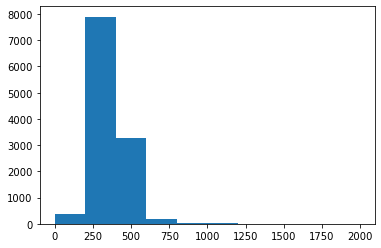

In [27]:
arrz = np.nan_to_num(np.array(time_in_44), nan=-1)
arrz = arrz[arrz>0]
arrz = arrz[arrz<2000]
plt.hist(arrz)